**<center><font size = "6">Hyperparameters Support Vector Machine Classifier<center>**
***

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Parámetros-por-defecto" data-toc-modified-id="Parámetros-por-defecto-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Parámetros por defecto</a></span></li><li><span><a href="#Loss=squared_hinge" data-toc-modified-id="Loss=squared_hinge-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loss=squared_hinge</a></span></li><li><span><a href="#Dual-=-False,-fit_intercept=False" data-toc-modified-id="Dual-=-False,-fit_intercept=False-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dual = False, fit_intercept=False</a></span></li><li><span><a href="#Loss=hinge,-dual=False,-fit_intercept=False" data-toc-modified-id="Loss=hinge,-dual=False,-fit_intercept=False-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Loss=hinge, dual=False, fit_intercept=False</a></span></li><li><span><a href="#Dual=False,-class_weight=Dict" data-toc-modified-id="Dual=False,-class_weight=Dict-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dual=False, class_weight=Dict</a></span></li><li><span><a href="#Penalty=l1" data-toc-modified-id="Penalty=l1-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Penalty=l1</a></span></li><li><span><a href="#Penalty=l1,-dual-=-False,-class_weight=Dict" data-toc-modified-id="Penalty=l1,-dual-=-False,-class_weight=Dict-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Penalty=l1, dual = False, class_weight=Dict</a></span></li></ul></div>

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

import pickle
X_train_smt = pickle.load(open("saved_feats/ShuffleSplit_X_train_smt", "rb"))
X_test = pickle.load(open("saved_feats/ShuffleSplit_X_test", "rb"))
y_train_smt = pickle.load(open("saved_feats/ShuffleSplit_y_train_smt", "rb"))
y_test = pickle.load(open("saved_feats/ShuffleSplit_y_test", "rb"))

# FORMATO DE PLOTS
plt.style.use('bmh')

## Parámetros por defecto

In [2]:
clf_svc = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr',
                    fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
clf_svc.fit(X_train_smt, y_train_smt)
pred_svc = clf_svc.predict(X_test)
estim_prob_svc = np.array(clf_svc.decision_function(
    X_test))  # decision is a voting function
pred_prob_svc = np.exp(estim_prob_svc)/np.sum(np.exp(estim_prob_svc),
                                              axis=1, keepdims=True)  # softmax after the voting

In [3]:
print('Predicted classes:', clf_svc.classes_)
print('Average accuracy :', np.mean(pred_svc == y_test)*100)
print('Train accuracy :', (clf_svc.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_svc.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_svc))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_svc))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 88.05805621899687
Train accuracy : 97.42591497470268
Test accuracy : 88.05805621899687

 CONFUSION MATRIX
[[  52   27   40]
 [  37   91  122]
 [  78  346 4650]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.31      0.44      0.36       119
     Neutral       0.20      0.36      0.25       250
    Positive       0.97      0.92      0.94      5074

    accuracy                           0.88      5443
   macro avg       0.49      0.57      0.52      5443
weighted avg       0.92      0.88      0.90      5443



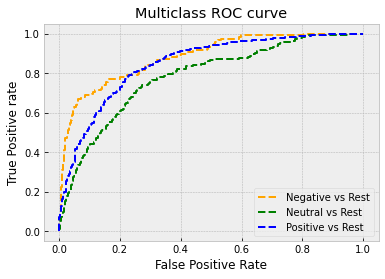

In [4]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_svc[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_svc[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_svc[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Loss=hinge

In [5]:
clf_svc_2 = LinearSVC(penalty='l2', loss='hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr',
                      fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
clf_svc_2.fit(X_train_smt, y_train_smt)
pred_svc_2 = clf_svc_2.predict(X_test)
estim_prob_svc_2 = np.array(clf_svc_2.decision_function(
    X_test))  # decision is a voting function
pred_prob_svc_2 = np.exp(estim_prob_svc_2)/np.sum(np.exp(estim_prob_svc_2),
                                                  axis=1, keepdims=True)  # softmax after the voting

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [6]:
print('Predicted classes:', clf_svc_2.classes_)
print('Average accuracy :', np.mean(pred_svc_2 == y_test)*100)
print('Train accuracy :', (clf_svc_2.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_svc_2.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_svc_2))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_svc_2))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 87.34153959213668
Train accuracy : 96.29410605164597
Test accuracy : 87.34153959213668

 CONFUSION MATRIX
[[  53   31   35]
 [  39  102  109]
 [  73  402 4599]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.32      0.45      0.37       119
     Neutral       0.19      0.41      0.26       250
    Positive       0.97      0.91      0.94      5074

    accuracy                           0.87      5443
   macro avg       0.49      0.59      0.52      5443
weighted avg       0.92      0.87      0.89      5443



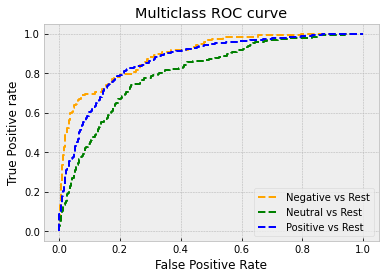

In [7]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_svc_2[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_svc_2[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_svc_2[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Dual = False, fit_intercept=False

In [8]:
clf_svc_3 = LinearSVC(penalty='l2', loss='squared_hinge', dual=False, tol=0.0001, C=1.0, multi_class='ovr',
                      fit_intercept=False, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
clf_svc_3.fit(X_train_smt, y_train_smt)
pred_svc_3 = clf_svc_3.predict(X_test)
estim_prob_svc_3 = np.array(clf_svc_3.decision_function(
    X_test))  # decision is a voting function
pred_prob_svc_3 = np.exp(estim_prob_svc_3)/np.sum(np.exp(estim_prob_svc_3),
                                                  axis=1, keepdims=True)  # softmax after the voting

In [9]:
print('Predicted classes:', clf_svc_3.classes_)
print('Average accuracy :', np.mean(pred_svc_3 == y_test)*100)
print('Train accuracy :', (clf_svc_3.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_svc_3.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_svc_3))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_svc_3))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 87.58037846775674
Train accuracy : 97.2320783231487
Test accuracy : 87.58037846775674

 CONFUSION MATRIX
[[  56   26   37]
 [  37   93  120]
 [  95  361 4618]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.30      0.47      0.36       119
     Neutral       0.19      0.37      0.25       250
    Positive       0.97      0.91      0.94      5074

    accuracy                           0.88      5443
   macro avg       0.49      0.58      0.52      5443
weighted avg       0.92      0.88      0.89      5443



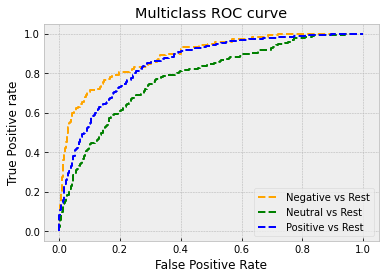

In [10]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_svc_3[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_svc_3[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_svc_3[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Loss=hinge, fit_intercept=False

In [11]:
clf_svc_4 = LinearSVC(penalty='l2', loss='hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr',
                      fit_intercept=False, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
clf_svc_4.fit(X_train_smt, y_train_smt)
pred_svc_4 = clf_svc_4.predict(X_test)
estim_prob_svc_4 = np.array(clf_svc_4.decision_function(
    X_test))  # decision is a voting function
pred_prob_svc_4 = np.exp(estim_prob_svc_4)/np.sum(np.exp(estim_prob_svc_4),
                                                  axis=1, keepdims=True)  # softmax after the voting

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
print('Predicted classes:', clf_svc_4.classes_)
print('Average accuracy :', np.mean(pred_svc_4 == y_test)*100)
print('Train accuracy :', (clf_svc_4.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_svc_4.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_svc_4))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_svc_4))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 86.8822340620981
Train accuracy : 96.1150535514817
Test accuracy : 86.8822340620981

 CONFUSION MATRIX
[[  53   33   33]
 [  37  101  112]
 [  84  415 4575]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.30      0.45      0.36       119
     Neutral       0.18      0.40      0.25       250
    Positive       0.97      0.90      0.93      5074

    accuracy                           0.87      5443
   macro avg       0.49      0.58      0.52      5443
weighted avg       0.92      0.87      0.89      5443



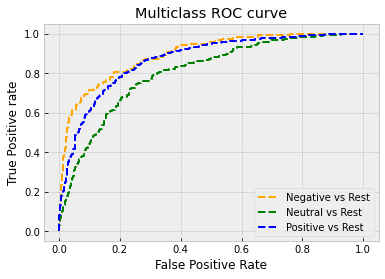

In [13]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_svc_4[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_svc_4[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_svc_4[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Dual=False, class_weight=Dict

In [14]:
clf_svc_5 = LinearSVC(penalty='l2', loss='squared_hinge', dual=False, tol=0.0001, C=1.0, multi_class='ovr',
                      fit_intercept=True, intercept_scaling=1, class_weight={'Negative': 0.2, 'Neutral': 0.5, 'Positive': 0.93}, verbose=0, random_state=None, max_iter=1000)
clf_svc_5.fit(X_train_smt, y_train_smt)
pred_svc_5 = clf_svc_5.predict(X_test)
estim_prob_svc_5 = np.array(clf_svc_5.decision_function(
    X_test))  # decision is a voting function
pred_prob_svc_5 = np.exp(estim_prob_svc_5)/np.sum(np.exp(estim_prob_svc_5),
                                                  axis=1, keepdims=True)  # softmax after the voting

In [15]:
print('Predicted classes:', clf_svc_5.classes_)
print('Average accuracy :', np.mean(pred_svc_5 == y_test)*100)
print('Train accuracy :', (clf_svc_5.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_svc_5.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_svc_5))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_svc_5))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 89.10527282748484
Train accuracy : 97.13844536434719
Test accuracy : 89.10527282748484

 CONFUSION MATRIX
[[  50   29   40]
 [  35   90  125]
 [  55  309 4710]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.36      0.42      0.39       119
     Neutral       0.21      0.36      0.27       250
    Positive       0.97      0.93      0.95      5074

    accuracy                           0.89      5443
   macro avg       0.51      0.57      0.53      5443
weighted avg       0.92      0.89      0.90      5443



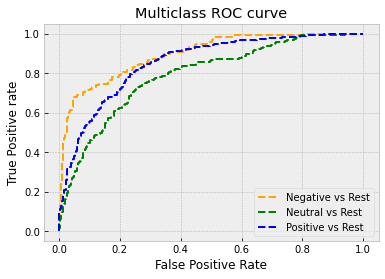

In [16]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_svc_5[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_svc_5[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_svc_5[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Penalty=l1, dual=False, fit_intercept=False

In [17]:
clf_svc_6 = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=0.0001, C=1.0, multi_class='ovr',
                      fit_intercept=False, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
clf_svc_6.fit(X_train_smt, y_train_smt)
pred_svc_6 = clf_svc_6.predict(X_test)
estim_prob_svc_6 = np.array(clf_svc_6.decision_function(
    X_test))  # decision is a voting function
pred_prob_svc_6 = np.exp(estim_prob_svc_6)/np.sum(np.exp(estim_prob_svc_6),
                                                  axis=1, keepdims=True)  # softmax after the voting

In [18]:
print('Predicted classes:', clf_svc_6.classes_)
print('Average accuracy :', np.mean(pred_svc_6 == y_test)*100)
print('Train accuracy :', (clf_svc_6.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_svc_6.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_svc_6))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_svc_6))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 87.15781738012126
Train accuracy : 97.70352848413168
Test accuracy : 87.15781738012126

 CONFUSION MATRIX
[[  53   26   40]
 [  37   92  121]
 [  95  380 4599]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.29      0.45      0.35       119
     Neutral       0.18      0.37      0.25       250
    Positive       0.97      0.91      0.94      5074

    accuracy                           0.87      5443
   macro avg       0.48      0.57      0.51      5443
weighted avg       0.92      0.87      0.89      5443



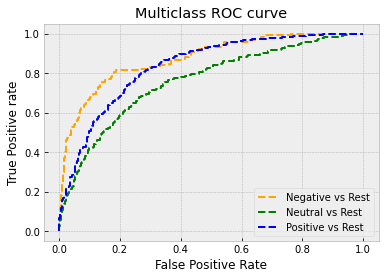

In [19]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_svc_6[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_svc_6[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_svc_6[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Penalty=l1, dual = False, class_weight=Dict (BEST RESULTS)

In [20]:
clf_svc_7 = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=0.0001, C=1.0, multi_class='ovr',
                      fit_intercept=True, intercept_scaling=1, class_weight={'Negative': 0.2, 'Neutral': 0.5, 'Positive': 0.93}, verbose=0, random_state=None, max_iter=1000)
clf_svc_7.fit(X_train_smt, y_train_smt)
pred_svc_7 = clf_svc_7.predict(X_test)
estim_prob_svc_7 = np.array(clf_svc_7.decision_function(
    X_test))  # decision is a voting function
pred_prob_svc_7 = np.exp(estim_prob_svc_7)/np.sum(np.exp(estim_prob_svc_7),
                                                  axis=1, keepdims=True)  # softmax after the voting

In [21]:
print('Predicted classes:', clf_svc_7.classes_)
print('Average accuracy :', np.mean(pred_svc_7 == y_test)*100)
print('Train accuracy :', (clf_svc_7.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_svc_7.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_svc_7))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_svc_7))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 88.60922285504319
Train accuracy : 97.51461988304094
Test accuracy : 88.60922285504319

 CONFUSION MATRIX
[[  48   28   43]
 [  33   86  131]
 [  69  316 4689]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.32      0.40      0.36       119
     Neutral       0.20      0.34      0.25       250
    Positive       0.96      0.92      0.94      5074

    accuracy                           0.89      5443
   macro avg       0.49      0.56      0.52      5443
weighted avg       0.92      0.89      0.90      5443



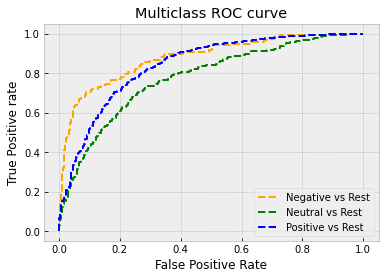

In [22]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_svc_7[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_svc_7[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_svc_7[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')